<a href="https://colab.research.google.com/github/rooncal/Data-Science/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and settings

In [1195]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

### Other models ###
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [1149]:
pd.options.display.max_colwidth = 999
HOTEL_DATA = "drive/MyDrive/Hotel-Data"

#Understanding the dataset

In [1150]:
df = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-train.csv')
validation_set = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-validation.csv')

In [1151]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119


In [1152]:
df.shape

(27499, 24)

In [1153]:
df.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [1154]:
df.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [1155]:
dictionary_df = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-data-dictionary.csv')

In [1156]:
dictionary_df

,Data Field,Description
0,Reservation-id,A unique booking id
1,Gender,Gender of the reservation person
2,Age,Age of the reservation person. Age is varying from 18 -- 70
3,Ethnicity,"Ethnicity of the reservation person. This field takes one of the following ethnicities: Latino, African American, Asian American and Caucasian"
4,Educational_Level,"Educational level of the reservation person. This field takes one of the following educational level; Mid-School, High-School, College and Grad"
5,Income,"Income of the reservation person. This field takes one of the following: <25K, 25K – 50K,50K – 100K and >100K"
6,Country_region,"Country region of the reservation person. This field takes one of the following: North, South, East and West"
7,Hotel_Type,"Hotel type of the reservation; i.e City Hotels, Airport Hotels and Resorts"
8,Expected_checkin,Expected check-in date
9,Expected_checkout,Expected checkout date


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde05eacfd0>]],
      dtype=object)

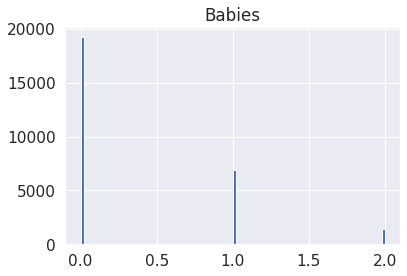

In [1157]:
df.hist(column="Babies", bins=100)

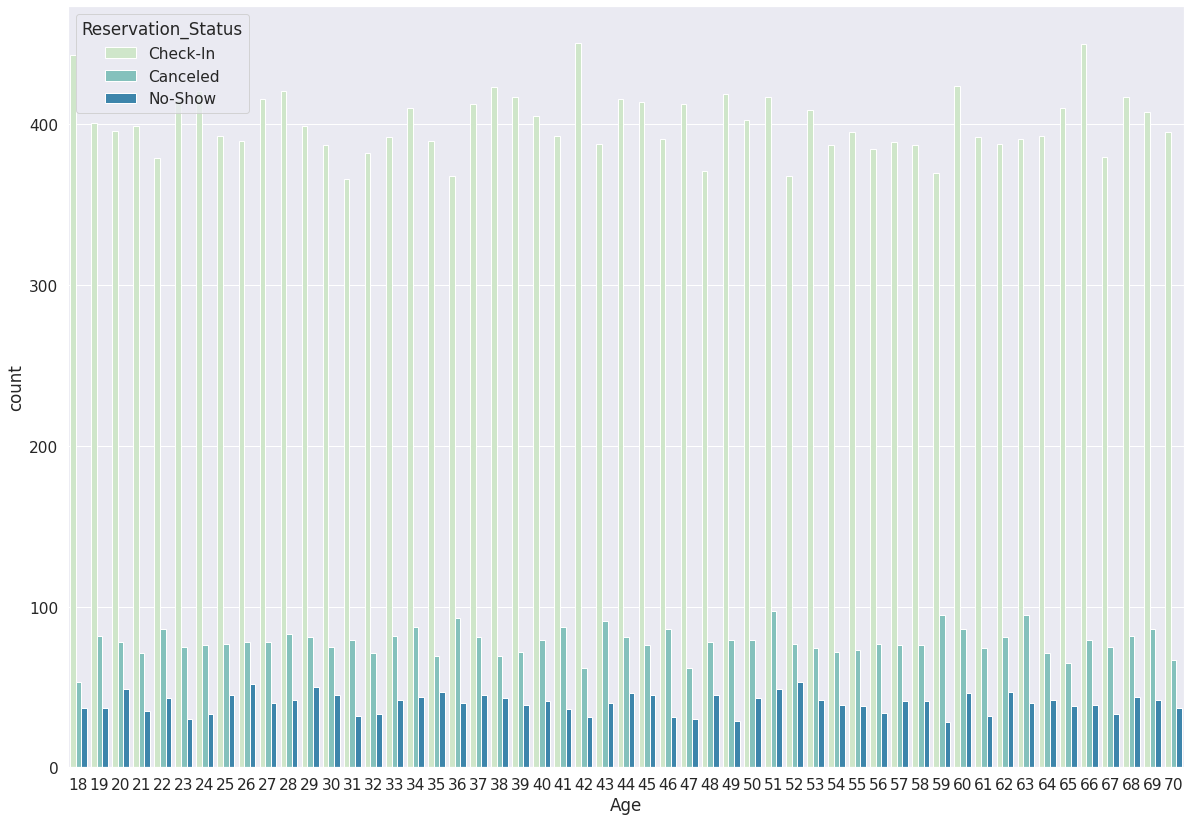

In [1158]:
plt.figure(figsize=(20,14))
sns.countplot(x='Age',data = df, hue = 'Reservation_Status',palette='GnBu')
plt.show()

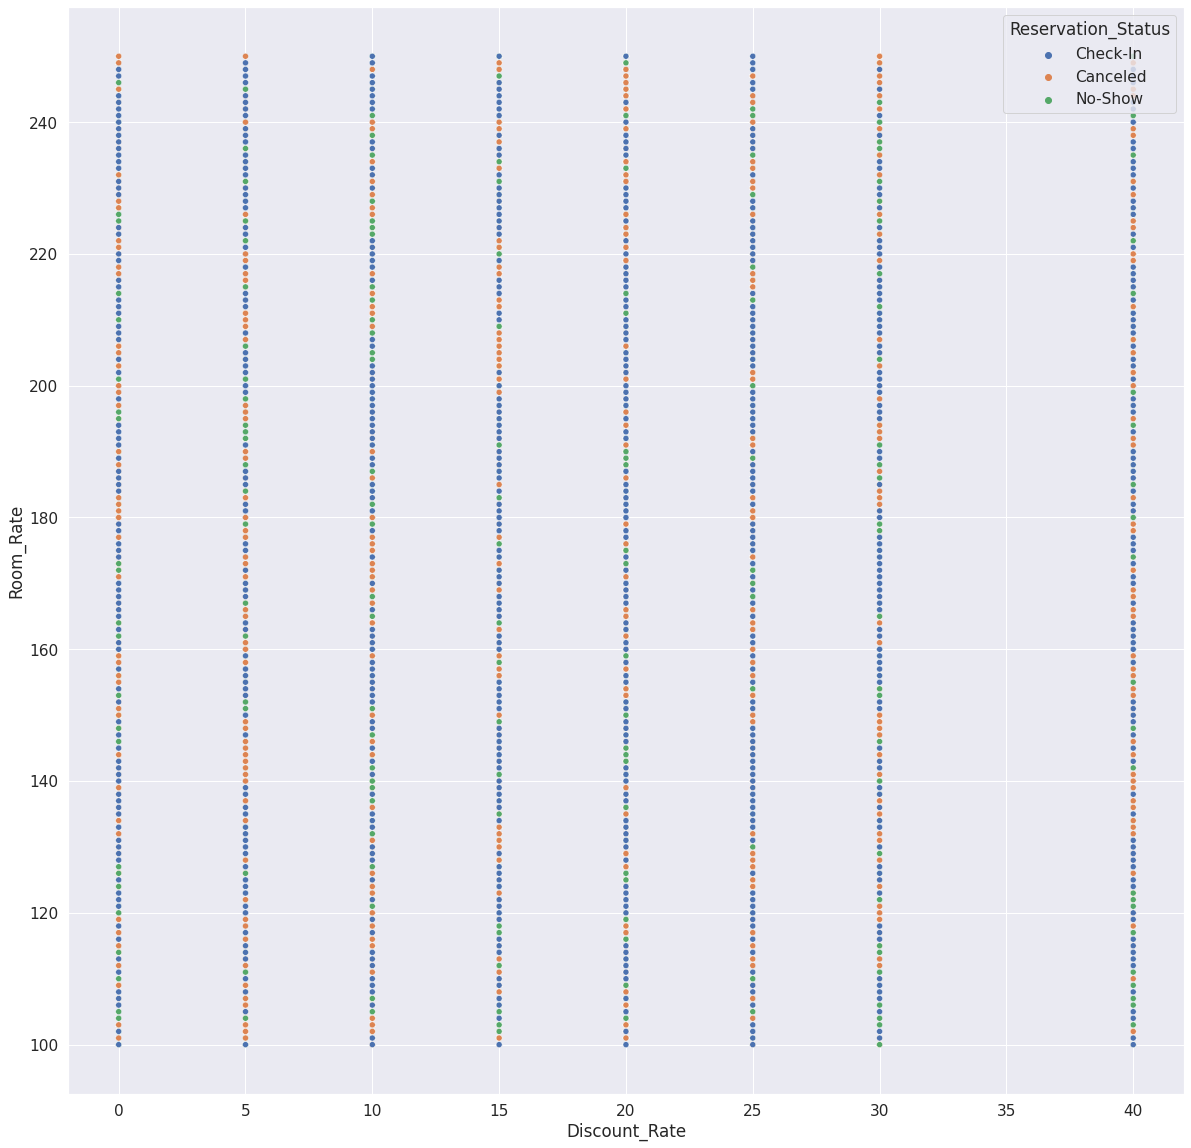

In [1159]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Discount_Rate',y='Room_Rate',data=df, hue='Reservation_Status')
plt.show()

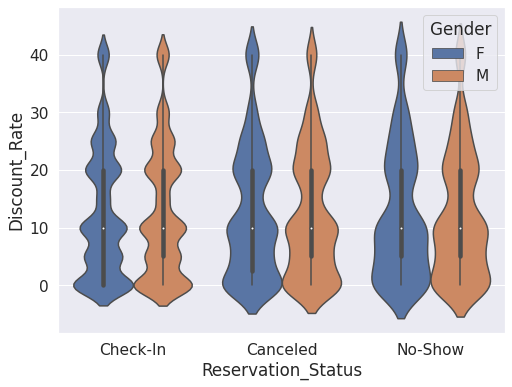

In [1160]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Reservation_Status',y='Discount_Rate',data=df, hue='Gender')
plt.show()

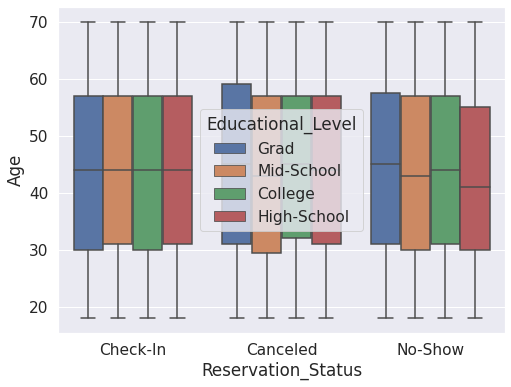

In [1161]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Reservation_Status',y='Age',data=df, hue='Educational_Level')
plt.show()

#Data Preprocessing

In [1162]:
df.isna().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [1163]:
df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [1164]:
df.drop_duplicates(subset ="Reservation-id", 
                     keep = False, inplace = True)
df = df.drop("Reservation-id",axis="columns")

In [1165]:
df.dtypes

Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [1166]:
df_2 = pd.get_dummies(df,drop_first=True)
columns = df.columns
label_encoder = preprocessing.LabelEncoder()
df["Reservation_Status"] = label_encoder.fit_transform(df["Reservation_Status"])
dummy_features = ['Gender', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region', 'Meal_Type', 'Visted_Previously', 'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 'Required_Car_Parking', 'Use_Promotion', 'Hotel_Type']
ordinal_features = ['Expected_checkin', 'Expected_checkout', 'Booking_date']
df = pd.get_dummies(data=df, columns=dummy_features)
ordinal_encoder = preprocessing.OrdinalEncoder()
for feature in ordinal_features:
  df[feature] = ordinal_encoder.fit_transform(pd.DataFrame(df[feature]))

In [1167]:
df.dtypes

Age                                int64
Expected_checkin                 float64
Expected_checkout                float64
Booking_date                     float64
Adults                             int64
Children                           int64
Babies                             int64
Reservation_Status                 int64
Discount_Rate                      int64
Room_Rate                          int64
Gender_F                           uint8
Gender_M                           uint8
Ethnicity_African American         uint8
Ethnicity_Asian American           uint8
Ethnicity_Latino                   uint8
Ethnicity_caucasian                uint8
Educational_Level_College          uint8
Educational_Level_Grad             uint8
Educational_Level_High-School      uint8
Educational_Level_Mid-School       uint8
Income_25K --50K                   uint8
Income_50K -- 100K                 uint8
Income_<25K                        uint8
Income_>100K                       uint8
Country_region_E

In [1168]:
df.head()

,Age,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort
0,40,655.0,713.0,690.0,2,2,0,1,10,218,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,49,655.0,713.0,706.0,3,3,0,1,0,185,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0
2,42,688.0,761.0,822.0,3,3,0,1,0,119,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0
3,25,688.0,746.0,790.0,4,3,0,1,5,144,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0
4,62,721.0,755.0,790.0,1,1,0,1,10,242,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1


In [1169]:
x = df[["Age", "Expected_checkin", "Expected_checkout", "Room_Rate", "Booking_date", "Discount_Rate", "Adults", "Children", "Babies"]].values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(x))
df[["Age", "Expected_checkin", "Expected_checkout", "Room_Rate", "Booking_date", "Discount_Rate", "Adults", "Children", "Babies"]] = df_scaled[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [1170]:
df.head()

,Age,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort
0,0.423077,0.727778,0.768319,0.609541,0.25,0.5,0.0,1,0.250,0.786667,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,0.596154,0.727778,0.768319,0.623675,0.50,1.0,0.0,1,0.000,0.566667,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0
2,0.461538,0.764444,0.820043,0.726148,0.50,1.0,0.0,1,0.000,0.126667,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0
3,0.134615,0.764444,0.803879,0.697880,0.75,1.0,0.0,1,0.125,0.293333,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0
4,0.846154,0.801111,0.813578,0.697880,0.00,0.0,0.0,1,0.250,0.946667,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1


In [1171]:
df.shape

(27491, 48)

In [1172]:
df.head(3)

,Age,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort
0,0.423077,0.727778,0.768319,0.609541,0.25,0.5,0.0,1,0.25,0.786667,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,0.596154,0.727778,0.768319,0.623675,0.50,1.0,0.0,1,0.00,0.566667,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0
2,0.461538,0.764444,0.820043,0.726148,0.50,1.0,0.0,1,0.00,0.126667,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0


#Feature Engineering

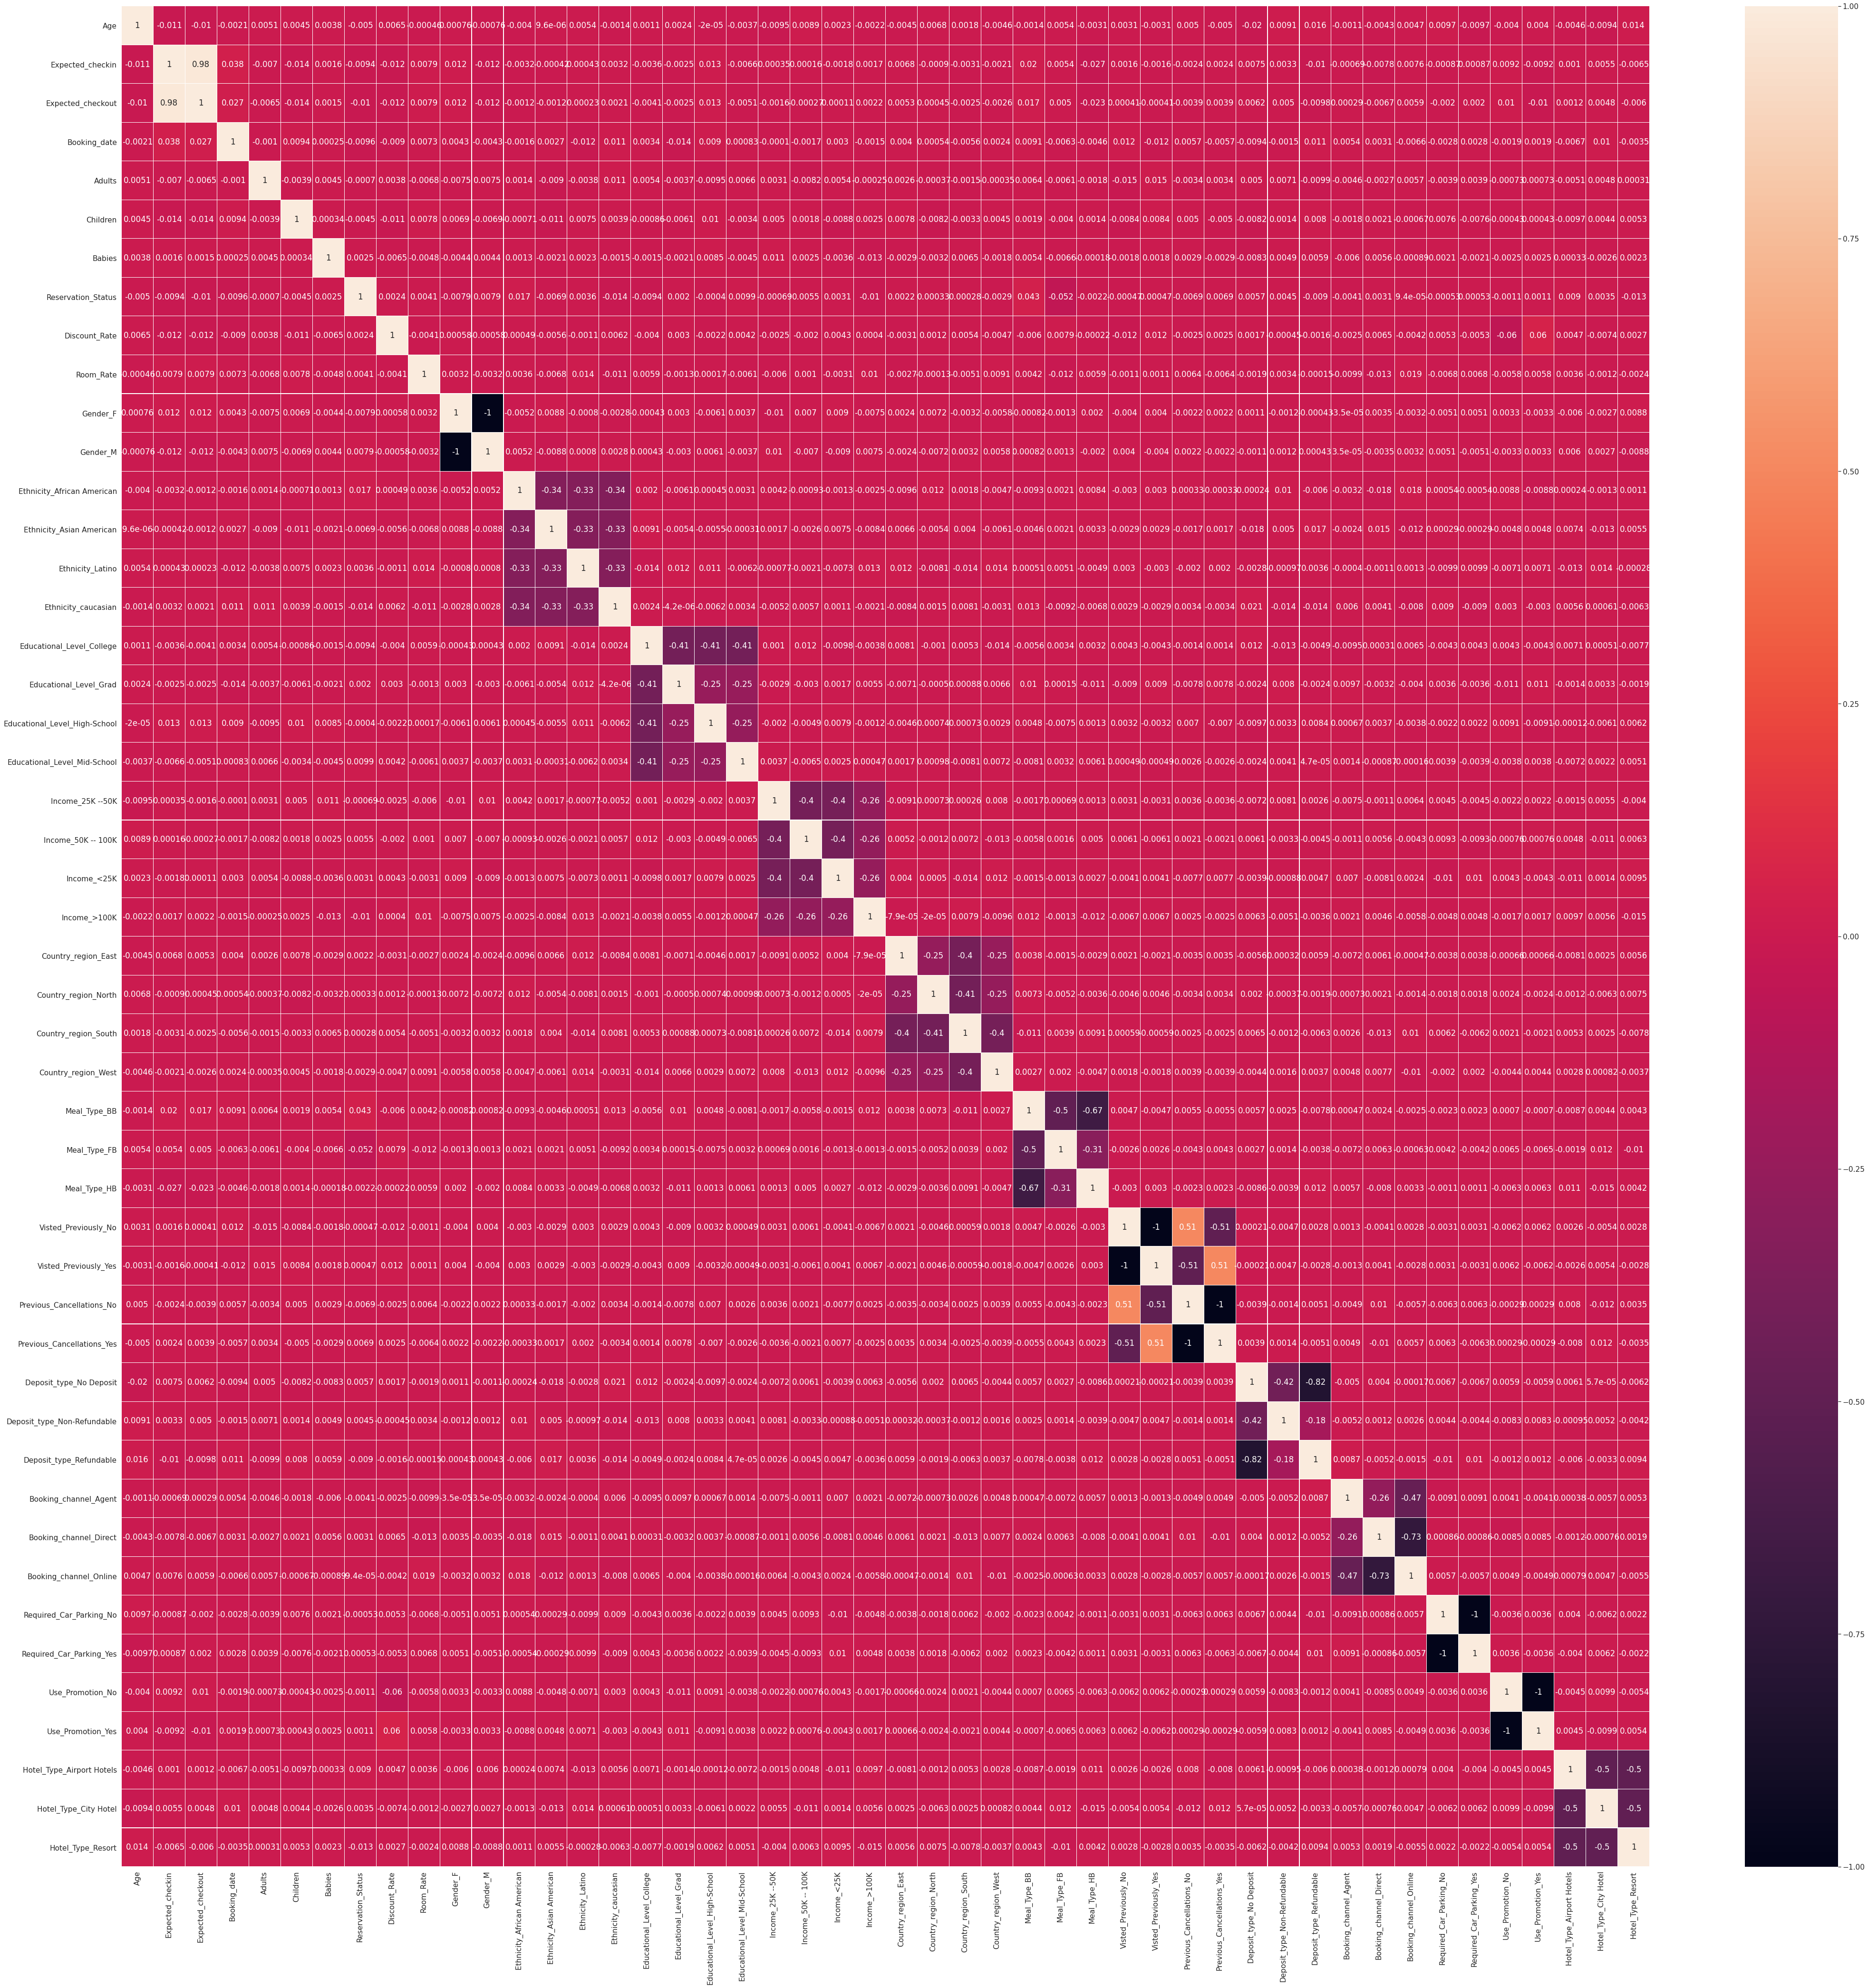

In [1173]:
plt.figure(figsize=(72,72))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [1174]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [1175]:
#columns_to_drop = find_correlation(df.drop(columns=['Reservation_Status']) , 0.7)
#df = df.drop(columns=columns_to_drop)

In [1176]:
df.dtypes

Age                              float64
Expected_checkin                 float64
Expected_checkout                float64
Booking_date                     float64
Adults                           float64
Children                         float64
Babies                           float64
Reservation_Status                 int64
Discount_Rate                    float64
Room_Rate                        float64
Gender_F                           uint8
Gender_M                           uint8
Ethnicity_African American         uint8
Ethnicity_Asian American           uint8
Ethnicity_Latino                   uint8
Ethnicity_caucasian                uint8
Educational_Level_College          uint8
Educational_Level_Grad             uint8
Educational_Level_High-School      uint8
Educational_Level_Mid-School       uint8
Income_25K --50K                   uint8
Income_50K -- 100K                 uint8
Income_<25K                        uint8
Income_>100K                       uint8
Country_region_E

In [1178]:
rf = RandomForestClassifier()
y = df.copy(deep=True)['Reservation_Status']
z = df.drop('Reservation_Status', axis=1)
z.fillna(1,inplace=True)
z.isna().sum()
model = rf.fit(z,y)

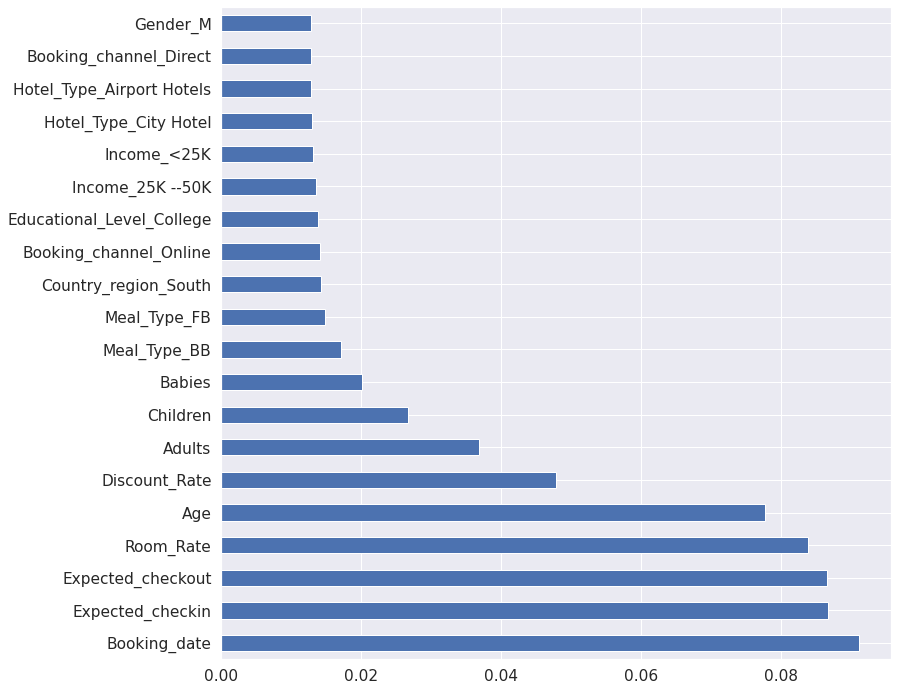

In [1180]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=z.columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh', figsize=(12,12))

#Applying ML Models

In [1182]:
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size = .2, random_state=9)

In [1183]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Reservation_Status, dtype: int64

In [1198]:
model = RandomForestClassifier(max_depth=5, n_estimators=50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7703218767048554


In [1199]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression : 0.7703218767048554
Decision Tree Classification : 0.6193853427895981
Gradient Boosting Classification : 0.7699581742134933
Ada Boosting Classification : 0.7703218767048554
Extra Tree Classification : 0.768139661756683
K-Neighbors Classification : 0.7314057101291144
Gaussian Naive Bayes : 0.7190398254228041


#Hyper Parameter Tuning



In [1192]:
random.seed(100)
rfmodel = RandomForestClassifier()

In [1197]:
n_estimators = [10, 20, 50, 100]
max_depth = [5,10,15,20]
hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(rfmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_rfmodel.fit(z, y)
print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Best Estimators: 50
Best Max Depth: 5


#Model Evaluation

In [1200]:
cm_lr = confusion_matrix(y_test,predictions)

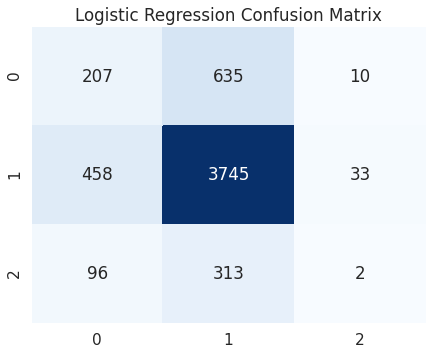

In [1201]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()